<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,96.708756,87.625148,-39.887323,154.446581,221.595704,-67.149122
1,0.0,1.0,56.577737,67.344946,62.104779,196.027463,145.199706,50.827757
2,0.0,2.0,65.069017,24.388738,-15.372503,84.085253,86.411389,-2.326135
3,0.0,3.0,73.437824,54.146192,61.037505,198.621521,142.840738,55.780784
4,0.0,4.0,79.258480,31.563873,-61.008423,59.813929,113.430491,-53.616562
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,79.146808,22.581609,21.756685,133.485102,118.461364,15.023739
59996,999.0,56.0,97.050414,89.770909,13.666846,210.488168,176.198635,34.289533
59997,999.0,57.0,35.748270,81.471664,-99.338993,27.880940,107.920841,-80.039900
59998,999.0,58.0,57.373357,29.141902,15.681656,112.196914,99.759067,12.437847


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    96.708756  87.625148 -39.887323  154.446581  221.595704   
      1.0    56.577737  67.344946  62.104779  196.027463  145.199706   
      2.0    65.069017  24.388738 -15.372503   84.085253   86.411389   
      3.0    73.437824  54.146192  61.037505  198.621521  142.840738   
      4.0    79.258480  31.563873 -61.008423   59.813929  113.430491   
...                ...        ...        ...         ...         ...   
999.0 55.0   79.146808  22.581609  21.756685  133.485102  118.461364   
      56.0   97.050414  89.770909  13.666846  210.488168  176.198635   
      57.0   35.748270  81.471664 -99.338993   27.880940  107.920841   
      58.0   57.373357  29.141902  15.681656  112.196914   99.759067   
      59.0   84.057753  57.122827   7.626465  158.807045  143.700992   

                 e_hat  
rep   index             
0.0   0.0   -67.149122  
      1.0    50.827757  
      2.0    -2.326135  
      3.0    55.780784  
      4.0   -53.616562  
...                ...  
999.0 55.0   15.023739  
      56.0   34.289533  
      57.0  -80.039900  
      58.0   12.437847  
      59.0   15.106053  

[60000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    96.708756  87.625148 -39.887323  154.446581  221.595704   
      1.0    56.577737  67.344946  62.104779  196.027463  145.199706   
      2.0    65.069017  24.388738 -15.372503   84.085253   86.411389   
      3.0    73.437824  54.146192  61.037505  198.621521  142.840738   
      4.0    79.258480  31.563873 -61.008423   59.813929  113.430491   
...                ...        ...        ...         ...         ...   
999.0 55.0   79.146808  22.581609  21.756685  133.485102  118.461364   
      56.0   97.050414  89.770909  13.666846  210.488168  176.198635   
      57.0   35.748270  81.471664 -99.338993   27.880940  107.920841   
      58.0   57.373357  29.141902  15.681656  112.196914   99.759067   
      59.0   84.057753  57.122827   7.626465  158.807045  143.700992   

                 e_hat  
rep   index             
0.0   0.0   -67.149122  
      1.0    50.827757  
      2.0    -2.326135  
      3.0    55.780784  
      4.0   -53.616562  
...                ...  
999.0 55.0   15.023739  
      56.0   34.289533  
      57.0  -80.039900  
      58.0   12.437847  
      59.0   15.106053  

[60000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,96.708756,87.625148,-39.887323,154.446581,221.595704,-67.149122
1,0.0,1.0,56.577737,67.344946,62.104779,196.027463,145.199706,50.827757
2,0.0,2.0,65.069017,24.388738,-15.372503,84.085253,86.411389,-2.326135
3,0.0,3.0,73.437824,54.146192,61.037505,198.621521,142.840738,55.780784
4,0.0,4.0,79.258480,31.563873,-61.008423,59.813929,113.430491,-53.616562
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,79.146808,22.581609,21.756685,133.485102,118.461364,15.023739
59996,999.0,56.0,97.050414,89.770909,13.666846,210.488168,176.198635,34.289533
59997,999.0,57.0,35.748270,81.471664,-99.338993,27.880940,107.920841,-80.039900
59998,999.0,58.0,57.373357,29.141902,15.681656,112.196914,99.759067,12.437847


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    96.708756  87.625148 -39.887323  154.446581  221.595704   
      1.0    56.577737  67.344946  62.104779  196.027463  145.199706   
      2.0    65.069017  24.388738 -15.372503   84.085253   86.411389   
      3.0    73.437824  54.146192  61.037505  198.621521  142.840738   
      4.0    79.258480  31.563873 -61.008423   59.813929  113.430491   
...                ...        ...        ...         ...         ...   
999.0 55.0   79.146808  22.581609  21.756685  133.485102  118.461364   
      56.0   97.050414  89.770909  13.666846  210.488168  176.198635   
      57.0   35.748270  81.471664 -99.338993   27.880940  107.920841   
      58.0   57.373357  29.141902  15.681656  112.196914   99.759067   
      59.0   84.057753  57.122827   7.626465  158.807045  143.700992   

                 e_hat  
rep   index             
0.0   0.0   -67.149122  
      1.0    50.827757  
      2.0    -2.326135  
      3.0    55.780784  
      4.0   -53.616562  
...                ...  
999.0 55.0   15.023739  
      56.0   34.289533  
      57.0  -80.039900  
      58.0   12.437847  
      59.0   15.106053  

[60000 rows x 6 columns]

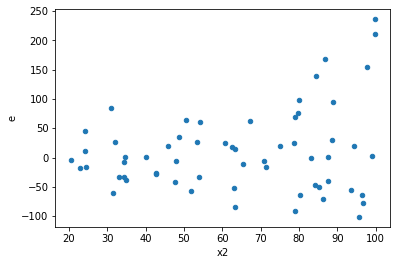

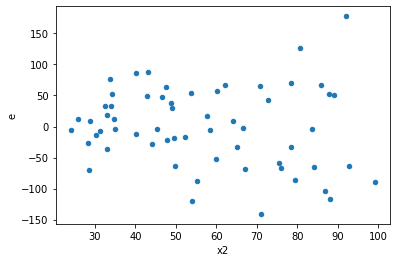

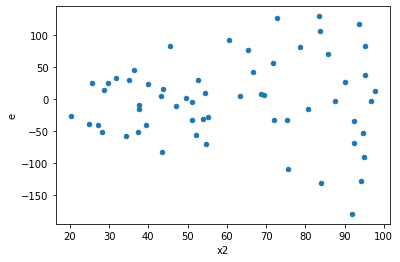

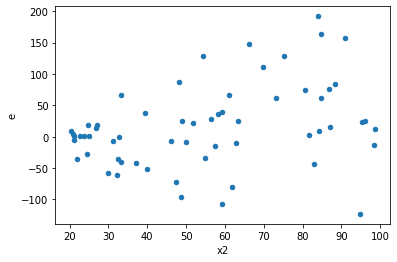

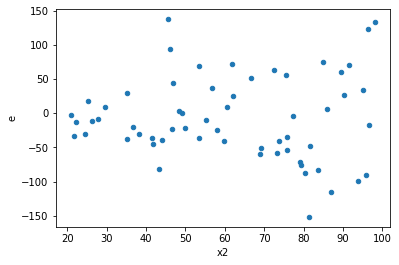

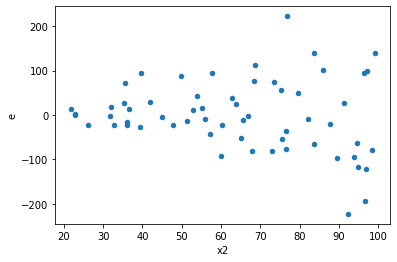

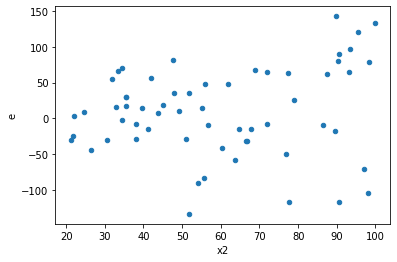

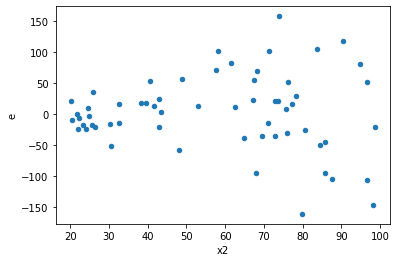

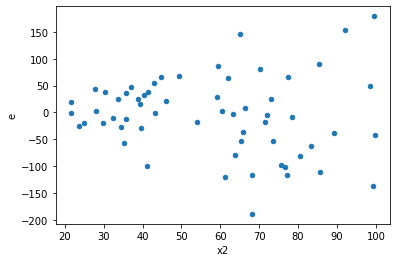

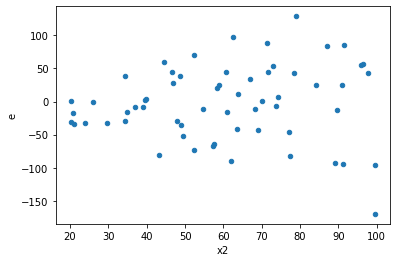

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,32.0,24.0,67239.3727051198,152486.9884848896,2101.2303970349935,6353.624520203733,3.0237638524405566,0.006542881346773832,0.9967285593266131,0.003271440673386916,Reject001=0 : Heteroscedasticity
6.0,24.0,32.0,58657.893358950154,153334.22247267165,2444.0788899562563,4791.694452270989,1.9605318273326071,0.07554871411637931,0.9622256429418103,0.037774357058189656,Reject001=1 : Homoscedasticity
7.0,35.0,21.0,106128.60716831444,107157.26159613024,3032.2459190946984,5102.726742672869,1.6828208789201138,0.2097705381877646,0.8951147309061177,0.1048852690938823,Reject001=1 : Homoscedasticity
10.0,23.0,33.0,34704.484076063054,262002.63614082255,1508.8906120027416,7939.473822449168,5.261795493519011,1.845274675349451e-05,0.9999907736266233,9.226373376747254e-06,Reject001=0 : Heteroscedasticity
11.0,17.0,39.0,62292.34392551187,150028.3279524434,3664.25552503011,3846.880203908805,1.0498395042679765,0.8636760242946329,0.5681619878526836,0.43183801214731643,Reject001=1 : Homoscedasticity
16.0,22.0,34.0,73971.04902620074,191936.78723434126,3362.3204102818518,5645.199624539448,1.6789594493364275,0.16998426101225705,0.9150078694938715,0.08499213050612853,Reject001=1 : Homoscedasticity
17.0,23.0,33.0,56054.2519371012,121591.10022582201,2437.1413885696174,3684.578794721879,1.5118444961801725,0.27188631894234283,0.8640568405288286,0.13594315947117142,Reject001=1 : Homoscedasticity
18.0,32.0,24.0,50809.625689159075,188975.6176909452,1587.800802786221,7873.984070456049,4.959050314522476,0.0001338371160393148,0.9999330814419803,6.69185580196574e-05,Reject001=0 : Heteroscedasticity
19.0,33.0,23.0,55024.57916031917,130527.10794809008,1667.4114897066415,5675.09164991696,3.4035339716385278,0.0031862388764114513,0.9984068805617943,0.0015931194382057257,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,22.0,34.0,154803.43668299174,95547.67487389396,7036.519849226897,2810.2257315851166,0.3993772193926059,0.026738959230007638,Reject001=1 : Homoscedasticity
1.0,32.0,24.0,67239.3727051198,152486.9884848896,2101.2303970349935,6353.624520203733,3.0237638524405566,0.006542881346773832,Reject001=0 : Heteroscedasticity
2.0,26.0,30.0,159327.39137580135,59803.300448000715,6127.976591376975,1993.4433482666905,0.32530205012071656,0.004775923504673191,Reject001=0 : Heteroscedasticity
3.0,28.0,28.0,180650.24451988723,40889.091805996286,6451.79444713883,1460.3247073570103,0.22634396047825406,0.0001858804115348596,Reject001=0 : Heteroscedasticity
4.0,32.0,24.0,155500.92767029462,56664.99489436595,4859.403989696707,2361.0414539319145,0.485870583910698,0.05695694626896852,Reject001=1 : Homoscedasticity
5.0,26.0,30.0,178939.75182308888,133297.68169813024,6882.29814704188,4443.256056604341,0.6456064473920129,0.26054478652595225,Reject001=1 : Homoscedasticity
6.0,24.0,32.0,58657.893358950154,153334.22247267165,2444.0788899562563,4791.694452270989,1.9605318273326071,0.07554871411637931,Reject001=1 : Homoscedasticity
7.0,35.0,21.0,106128.60716831444,107157.26159613024,3032.2459190946984,5102.726742672869,1.6828208789201138,0.2097705381877646,Reject001=1 : Homoscedasticity
8.0,30.0,26.0,187758.89274442184,99672.09246754646,6258.629758147395,3833.5420179825564,0.6125209776136872,0.19628018439341596,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      611
Reject001=0 : Heteroscedasticity    389
Name: Result_test, dtype: int64